# EV3 Character Recognition Experiment - Train

1. Load the dataset
2. Extract the feature set (X) and target label set (y)
3. Train the model
4. Save the model
5. Analyse the model (model complexity curve, confusion matrix & classifiaction report)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_dataset = pd.read_csv('./clean_data/training_dataset.csv')
df_dataset.head()

,0,10,20,30,40,50,60,70,80,90,...,280,290,300,310,320,330,340,350,360,target
0,11,11,11,11,11,10,11,11,11,11,...,8,8,9,9,11,12,11,10,11,0
1,11,12,11,11,11,10,10,11,11,11,...,7,8,9,10,12,11,11,10,11,0
2,11,11,11,11,10,10,10,11,11,11,...,8,8,9,9,11,11,11,10,11,0
3,11,12,11,11,10,11,11,11,11,11,...,8,8,9,10,11,11,11,11,11,0
4,11,11,11,11,11,11,10,11,10,11,...,8,8,9,10,12,12,11,11,11,0


In [3]:
df_dataset.shape

(100, 38)

In [4]:
# Extract the feature (column) names of the data
feature_names = df_dataset.columns.drop('target')
feature_names

Index(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110',
       '120', '130', '140', '150', '160', '170', '180', '190', '200', '210',
       '220', '230', '240', '250', '260', '270', '280', '290', '300', '310',
       '320', '330', '340', '350', '360'],
      dtype='object')

In [5]:
# Extract the data as X
X = df_dataset.drop(labels='target', axis=1)
X

,0,10,20,30,40,50,60,70,80,90,...,270,280,290,300,310,320,330,340,350,360
0,11,11,11,11,11,10,11,11,11,11,...,7,8,8,9,9,11,12,11,10,11
1,11,12,11,11,11,10,10,11,11,11,...,7,7,8,9,10,12,11,11,10,11
2,11,11,11,11,10,10,10,11,11,11,...,8,8,8,9,9,11,11,11,10,11
3,11,12,11,11,10,11,11,11,11,11,...,7,8,8,9,10,11,11,11,11,11
4,11,11,11,11,11,11,10,11,10,11,...,8,8,8,9,10,12,12,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,5,5,7,8,8,8,9,10,9,...,6,5,6,6,7,7,6,5,5,4
96,5,5,5,7,8,8,9,10,9,9,...,6,6,6,5,6,7,6,6,5,5
97,5,5,6,7,8,8,9,9,9,9,...,6,5,5,6,6,6,6,5,4,5
98,4,5,6,7,8,9,9,9,10,9,...,6,6,6,6,6,7,6,5,4,4


In [6]:
# Extract a list of all posible targets (i.e. numbers 0 to 9)
target_names = df_dataset['target'].unique() #list(range(0,10))
target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# Extract the target results column as y
y = df_dataset['target']
y

0     0
1     0
2     0
3     0
4     0
     ..
95    9
96    9
97    9
98    9
99    9
Name: target, Length: 100, dtype: int64

## Train the model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [9]:
# Split the data into training (70%) and test (30%), set the random generator seed and mix the rows
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [10]:
# Initialise the classifier, passing in the expected number of unique targets
knn = KNeighborsClassifier(n_neighbors=10)

In [11]:
# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

## Save the ML Model

In [12]:
# Serialise and save the model to disk
pickle.dump(knn, open('./ml_model/number_reflectivity_knn_model', 'wb'))

In [13]:
# Predict the target value of each test data row
y_pred = knn.predict(X_test)

In [14]:
print(f"Test set predictions: {y_pred}")

Test set predictions: [4 1 3 0 7 8 2 6 6 8 0 8 9 7 5 2 4 5 5 6 0 1 9 9 1 2 3 7 3 4]


In [15]:
# Calculate the accuracy of the model on the test data
knn.score(X_test, y_test)

1.0

## Model Complexity Curve

In [16]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1,12)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

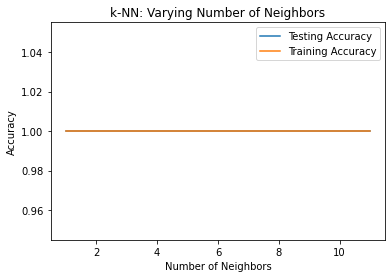

In [17]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [18]:
# Test and training accuracy are both 100% indicating the data is relatively simple and the 
# reflectivity signatures of each number well defined with little overlap

## Confusion Matrix

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# From the top left of the matrix (for numbers 0 to 9), the vertical rows represent actual values and the horizontal 
# columns represent predicted values. There are no instances were the actual and predicted values are different.
# Hence, the diagional represents a count of all rows where the actual and predicted values are the same. 
# Therefore, in this case, the predicted results are 100% accurate

print(confusion_matrix(y_test, y_pred))

[[3 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 3]]


## Classification Report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

